In [3]:
import serial
import matplotlib.pyplot as plt
import atexit
from time import sleep
import pandas as pd
import os
import os
print(os.environ['PATH'])

/home/mv_yurchenko/.local/bin:/home/mv_yurchenko/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


# Подключаем Ардуино

### Открытие порта

In [5]:
serialArduino = serial.Serial("/dev/ttyUSB0", baudrate=115200 ,timeout=0.1)

### Определяем функцию, которая будет выполняться при закрытии сессии 

In [6]:
def exit_function():
    serialArduino.close()
    print("Закрываем Serial сессию")
    print("serialArduino.isOpen() = " + str(serialArduino.isOpen()))

### Подготовка ардуино к считыванию данных

In [7]:
sleep(3)

atexit.register(exit_function);

### Коэффициенты битовых преобразований

In [8]:
base_coeff = 255/5
collector_coeff = 4095/5

### Ввод данных

In [17]:
fixed = input("Что фиксируем?:")
fixed_voltage = float(input("Введите фиксированное напряжение(0-5В):"))
start = float(input("Введите начальное значение(0-5В):"))
stop = float(input("Введите конечное значеие(0-5В):"))
fixed_min = 2
fixed_max = 3.8

Что фиксируем?:c
Введите фиксированное напряжение(0-5В):3.5
Введите начальное значение(0-5В):0
Введите конечное значеие(0-5В):5


### Обработка введенных данных

In [18]:
## База : 256
## Коллектор : 4095
# columns = ['U', 'Ib', 'Ic']
print(stop)
fixed_arr = [fixed_min, fixed_voltage, fixed_max]


if fixed[0].lower() == "b":
    is_base_fixed = True
else:
    is_base_fixed = False
is_collector_fixed = not is_base_fixed

if is_base_fixed:
    fixed_arr = [fixed_v * base_coeff for fixed_v in fixed_arr]
    start = start * collector_coeff
    stop = stop * collector_coeff
    what_fixed = "B"
if is_collector_fixed:
    ffixed_arr = [fixed_v * collector_coeff for fixed_v in fixed_arr]
    start = start * base_coeff
    stop = stop * base_coeff
    what_fixed = "K"
fixed_arr
stop

5.0


255.0

### Генерация команы для ардуино

In [19]:
requests = list()
for fixed_v in fixed_arr:
    request = what_fixed + str(int(fixed_v)) + ","+ str(int(start))+ "," + str(int(stop))+"Q"
    print(stop)
    requests.append(request)
requests

255.0
255.0
255.0


['K2,0,255Q', 'K3,0,255Q', 'K3,0,255Q']

### Проверка готовности ардуино к работе

In [20]:
print("Готовность к  = " + str(serialArduino.isOpen()))

Готовность к  = True


### Отправляем команду на ардуино и считываем ответ 

In [21]:
data = list()
for request in requests:
    serialArduino.write(request.encode("ASCII"))

    serialArduino.flush()
    values = list()

    exit_fl = False

    while not exit_fl:
        valueRead = serialArduino.readline()
        values.append(str(valueRead))
        print(valueRead)
        if b">" in valueRead:
            exit_fl = True
    data.append(values)

b'K2,0,255Q0;0.000000;0.000000;0.000000;0.000000\r\n'
b'1;0.000002;0.000000;0.000000;0.000000\r\n'
b'2;0.000005;0.000000;0.000000;0.000000\r\n'
b'3;0.000008;0.000000;0.000000;0.000000\r\n'
b'4;0.000012;0.000000;0.000000;0.000000\r\n'
b'5;0.000011;0.000000;0.004888;0.000000\r\n'
b'6;0.000009;0.000000;0.009775;0.000000\r\n'
b'7;0.000006;0.000000;0.014663;0.000000\r\n'
b'8;0.000011;0.000000;0.014663;0.000000\r\n'
b'9;0.000008;0.000000;0.019550;0.000000\r\n'
b'10;0.000007;0.000000;0.024438;0.000000\r\n'
b'11;0.000010;0.000000;0.024438;0.000000\r\n'
b'12;0.000008;0.000000;0.029326;0.000000\r\n'
b'13;0.000006;0.000000;0.034213;0.000000\r\n'
b'14;0.000009;0.000000;0.034213;0.000000\r\n'
b'15;0.000008;0.000000;0.039101;0.000000\r\n'
b'16;0.000011;0.000000;0.039101;0.000000\r\n'
b'17;0.000003;0.000000;0.048876;0.000000\r\n'
b'18;0.000008;0.000000;0.048876;0.000000\r\n'
b'19;0.000005;0.000000;0.053763;0.000000\r\n'
b'20;0.000009;0.000000;0.053763;0.000000\r\n'
b'21;0.000007;0.000000;0.058651;0.0

b'204;0.000088;0.000000;0.562072;0.000000\r\n'
b'205;0.000086;0.000000;0.566960;0.000000\r\n'
b'206;0.000089;0.000000;0.566960;0.000000\r\n'
b'207;0.000093;0.000000;0.566960;0.000000\r\n'
b'208;0.000096;0.000000;0.566960;0.000000\r\n'
b'209;0.000099;0.000000;0.566960;0.000000\r\n'
b'210;0.000103;0.000000;0.566960;0.000000\r\n'
b'211;0.000106;-0.000010;0.566960;0.004888\r\n'
b'212;0.000110;0.000000;0.566960;0.000000\r\n'
b'213;0.000114;0.000000;0.566960;0.000000\r\n'
b'214;0.000111;0.000000;0.571847;0.000000\r\n'
b'215;0.000114;-0.000010;0.571847;0.004888\r\n'
b'216;0.000119;0.000000;0.571847;0.000000\r\n'
b'217;0.000122;-0.000010;0.571847;0.004888\r\n'
b'218;0.000125;0.000000;0.571847;0.000000\r\n'
b'219;0.000129;-0.000010;0.571847;0.004888\r\n'
b'220;0.000132;0.000000;0.571847;0.000000\r\n'
b'221;0.000130;0.000000;0.576735;0.000000\r\n'
b'222;0.000134;0.000000;0.576735;0.000000\r\n'
b'223;0.000137;-0.000010;0.576735;0.004888\r\n'
b'224;0.000140;0.000000;0.576735;0.000000\r\n'
b'225;0.

b'151;0.000003;0.000000;0.474096;0.000000\r\n'
b'152;0.000000;0.000000;0.478983;0.000000\r\n'
b'153;0.000003;0.000000;0.478983;0.000000\r\n'
b'154;0.000002;0.000000;0.483871;0.000000\r\n'
b'155;-0.000000;0.000000;0.488759;0.000000\r\n'
b'156;0.000004;0.000000;0.488759;0.000000\r\n'
b'157;0.000007;0.000000;0.488759;0.000000\r\n'
b'158;0.000006;0.000000;0.493646;0.000000\r\n'
b'159;0.000003;0.000000;0.498534;0.000000\r\n'
b'160;0.000006;0.000000;0.498534;0.000000\r\n'
b'161;0.000010;0.000000;0.498534;0.000000\r\n'
b'162;0.000008;0.000000;0.503421;0.000000\r\n'
b'163;0.000006;0.000000;0.508309;0.000000\r\n'
b'164;0.000010;0.000000;0.508309;0.000000\r\n'
b'165;0.000013;0.000000;0.508309;0.000000\r\n'
b'166;0.000011;0.000000;0.513196;0.000000\r\n'
b'167;0.000015;0.000000;0.513196;0.000000\r\n'
b'168;0.000013;0.000000;0.518084;0.000000\r\n'
b'169;0.000017;0.000000;0.518084;0.000000\r\n'
b'170;0.000020;0.000000;0.518084;0.000000\r\n'
b'171;0.000019;0.000000;0.522972;0.000000\r\n'
b'172;0.0000

b'95;-0.000001;0.000000;0.298143;0.000000\r\n'
b'96;0.000002;0.000000;0.298143;0.000000\r\n'
b'97;0.000001;0.000000;0.303030;0.000000\r\n'
b'98;0.000004;0.000000;0.303030;0.000000\r\n'
b'99;0.000003;0.000000;0.307918;0.000000\r\n'
b'100;0.000001;0.000000;0.312805;0.000000\r\n'
b'101;0.000004;0.000000;0.312805;0.000000\r\n'
b'102;0.000002;0.000000;0.317693;0.000000\r\n'
b'103;0.000000;0.000000;0.322581;0.000000\r\n'
b'104;0.000004;0.000000;0.322581;0.000000\r\n'
b'105;0.000002;0.000000;0.327468;0.000000\r\n'
b'106;0.000000;0.000000;0.332356;0.000000\r\n'
b'107;-0.000002;0.000000;0.337243;0.000000\r\n'
b'108;0.000002;0.000000;0.337243;0.000000\r\n'
b'109;-0.000000;0.000000;0.342131;0.000000\r\n'
b'110;0.000004;0.000000;0.342131;0.000000\r\n'
b'111;-0.000004;0.000000;0.351906;0.000000\r\n'
b'112;-0.000001;0.000000;0.351906;0.000000\r\n'
b'113;0.000003;0.000000;0.351906;0.000000\r\n'
b'114;0.000001;0.000000;0.356794;0.000000\r\n'
b'115;-0.000000;0.000000;0.361681;0.000000\r\n'
b'116;0.0000

### Обработка полученных данных

In [22]:
for index, values in enumerate(data): 
    # Удаляем последний приянятый элемент и мусор из первого принятого
    values[0] = values[0][len("b'" + what_fixed+ str(fixed) + "," + str(int(start))+ "," + str(int(stop))+"Q"):]
    values = values[:-1]

    # Считаем кол-во элементов
    count_of_values = len(values)

    # Разделяем значения
    for i in range(count_of_values):
        values[i] = values[i][:-5]
        values[i] = values[i][2:]
        values[i] = values[i].split(';')
    data[index] = values

### Создаем dataframe и конвертируем данные в float64

In [23]:
df1 = pd.DataFrame(data[0])
df1[0][0] = float(start)
df1 = df1.astype('float64')
df1.columns = ['j', 'Ib', 'Ic', 'Ube', 'Uce']
df1['Ube'][0] = df1['Ube'][1]
df1['Uce'][0] = df1['Uce'][1]
df1['Ic'][0] = df1['Ic'][1]

df2 = pd.DataFrame(data[1])
df2[0][0] = float(start)
df2= df2.astype('float64')
df2.columns = ['j', 'Ib', 'Ic', 'Ube', 'Uce']
df2['Ube'][0] = df2['Ube'][1]
df2['Uce'][0] = df2['Uce'][1]

df3 = pd.DataFrame(data[2])
df3[0][0] = float(start)
df3 = df3.astype('float64')
df3.columns = ['j', 'Ib', 'Ic', 'Ube', 'Uce']
df3['Ube'][0] = df3['Ube'][1]
df3['Uce'][0] = df3['Uce'][1]

### Преобразуем из битов в вольты

In [24]:
# if is_base_fixed:
#     df['j'] = df['j'] * 1/collector_coeff

# if is_collector_fixed:
#     df['j'] = df['j'] * 1/base_coef

### Готовим данные к визуализации

In [25]:
df.columns = ['j', 'Ib', 'Ic', 'Ube', 'Uce']
df.head(20)

NameError: name 'df' is not defined

## Построение графиков

 ### Ток базы от напряжения базы $$f(U_b) = I_b$$

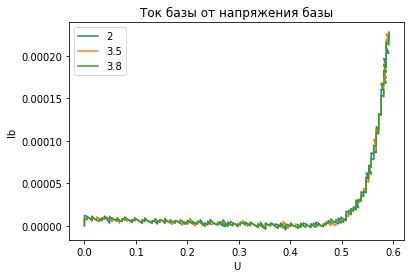

In [26]:
if not is_base_fixed: 
    plt.plot(df1['Ube'], df1['Ib'], df2['Ube'], df2['Ib'], df3['Ube'], df3['Ib'])
    plt.legend(fixed_arr)
    plt.title("Ток базы от напряжения базы")
    plt.xlabel("U")
    plt.ylabel("Ib")

 ### Ток коллектора от напряжения коллектора $$f(U_c) = I_c$$

In [27]:
if not is_collector_fixed:
    plt.plot(df1['Uce'], df1['Ic'], df2['Uce'], df2['Ic'], df3['Uce'], df3['Ic'])
    plt.legend(fixed_arr)
    plt.title("Ток коллектора от напряжения коллектора")
    plt.xlabel('Uc')
    plt.ylabel('Ice')
    plt.xlim([0,5])